<a href="https://colab.research.google.com/github/Pestrdan/netology_research/blob/main/NPL_12_HW1_%D0%A2%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json

import bz2
import regex
from tqdm import tqdm
from scipy import sparse

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Часть 1. Анализ текстов**

In [ ]:
with bz2.open('drive/My Drive/banki_responses.json.bz2', 'rt', encoding='utf-8') as f:
  df = pd.read_json(f, lines=True)

In [ ]:
df.head(10)

,city,rating_not_checked,title,num_comments,bank_license,author,bank_name,datetime,text,rating_grade
0,г. Воронеж,True,Ипотека на 5+,0,лицензия № 1623,e.novikova,ВТБ 24,2015-06-08 11:06:56,Здравствуйте! Хотелось бы выразить благодарно...,5.0
1,г. Казань,True,ЗВОНКИ СОСЕДЯМ,0,лицензия № 2289,KZN\Vorontsova_NA,Русский Стандарт,2015-06-06 18:17:52,Уважаемые представители департамента по работе...,2.0
2,г. Санкт-Петербург,True,Ложная информация!!!!,0,лицензия № 2307,Evgenia15,Союз,2015-06-07 19:08:33,Здравствуйте. Столкнулась с такой ситуацией. в...,2.0
3,г. Москва,True,Банкомат не зачислил деньги на счет,1,лицензия № 2557,dolgov.work,Ситибанк,2015-06-07 19:22:00,1 июня 2015 в Москве в отделении по адресу Смо...,1.0
4,г. Волгоград,True,Невозможно закрыть карту 2(два)!!!,0,лицензия № 3354,copLine,Ренессанс Кредит,2015-06-08 14:54:55,История очень долгая! Пришел я в банк (это раз...,1.0
5,г. Москва,False,Жалоба,0,лицензия № 2562,uhnov1,Бинбанк,2015-06-08 12:50:54,Добрый день! Я не являюсь клиентом банка и пор...,NaN
6,г. Новосибирск,False,Не могу пользоваться услугой Сбербанк он-лайн,0,лицензия № 1481,Foryou,Сбербанк России,2015-06-08 11:09:57,Доброго дня! Являюсь держателем зарплатной кар...,NaN
7,г. Краснодар,True,Информирование по электронной почте.,0,лицензия № 2518,secofr,Кубань Кредит,2015-06-06 13:10:53,Здравствуйте. Есть у меня VISA Electron от Куб...,3.0
8,г. Москва,True,Выплаты по Транспортному,4,лицензия № 1623,Бафомет,ВТБ 24,2015-06-06 13:40:55,"Послеотзыва лицензии у Транспортного, с нетерп...",2.0
9,г. Москва,True,Большая блаодарность!,0,лицензия № 1623,кристина1987,ВТБ 24,2015-06-08 14:43:51,Хочу поблагодарить Надежду из отдела по ипотеч...,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201030 entries, 0 to 201029
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   city                185492 non-null  object        
 1   rating_not_checked  201030 non-null  bool          
 2   title               201030 non-null  object        
 3   num_comments        201030 non-null  int64         
 4   bank_license        201026 non-null  object        
 5   author              201009 non-null  object        
 6   bank_name           201030 non-null  object        
 7   datetime            201030 non-null  datetime64[ns]
 8   text                201030 non-null  object        
 9   rating_grade        136189 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 14.0+ MB


**1. Посчитайте количество отзывов в разных городах и на разные банки**

In [ ]:
df_small = df.iloc[0:10000]

In [ ]:
df_small.groupby(['city','bank_name'])['text'].count().sort_values(ascending=False).head(20)

city                bank_name                
г. Москва           Сбербанк России              516
                    Альфа-Банк                   355
                    Тинькофф Банк                340
                    ВТБ 24                       300
                    Русский Стандарт             246
                    Хоум Кредит Банк             170
                    Московский Кредитный Банк    164
                    Банк Москвы                  151
г. Санкт-Петербург  Сбербанк России              138
г. Москва           Промсвязьбанк                107
                    Киви Банк                    102
                    Связной Банк                  99
                    Бинбанк                       83
                    Национальный Банк «Траст»     82
                    ОТП Банк                      70
                    Ренессанс Кредит              69
                    Восточный Экспресс Банк       69
г. Санкт-Петербург  ВТБ 24                        67


**2. Постройте гистограмы длин текстов в символах и в словах**

In [ ]:
import re

In [ ]:
count_words = []
for i in df_small.text:
  string = len(re.sub(r'[^\w\s]', '', i.lower()).replace(u'\xa0', u'').split())
  count_words.append(string)

Text(0, 0.5, 'Кол-во текстов')

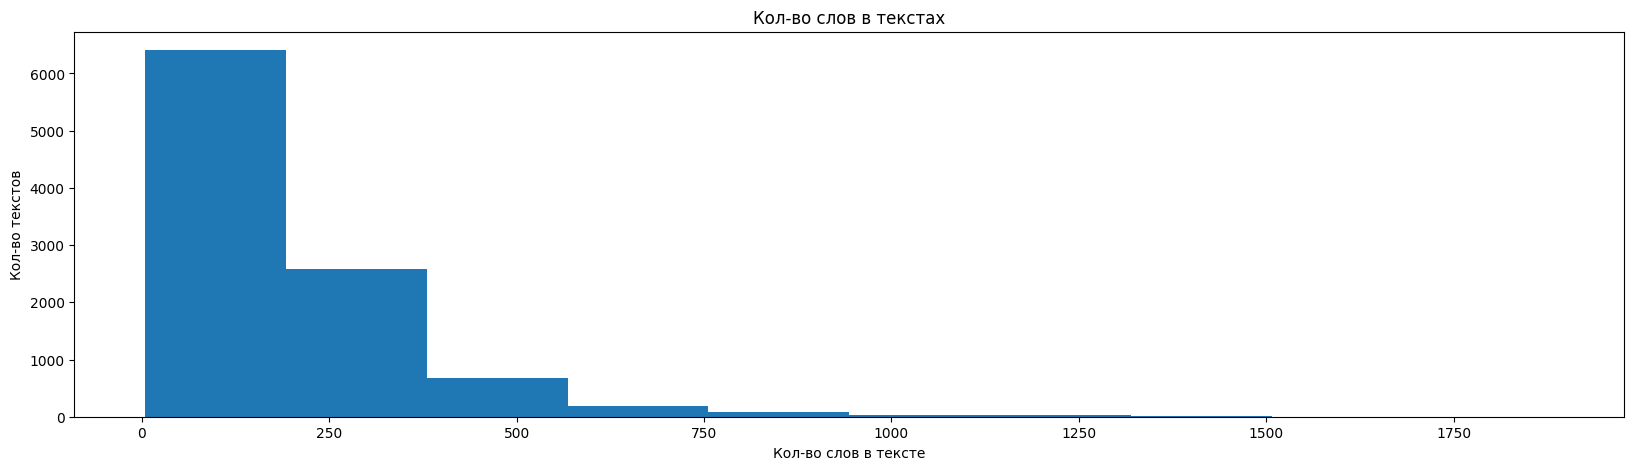

In [ ]:
plt.figure(figsize=(20,5))
plt.hist(count_words)
plt.title("Кол-во слов в текстах")
plt.xlabel("Кол-во слов в тексте")
plt.ylabel("Кол-во текстов")

In [ ]:
count_letters = []
for i in df_small.text:
  string = len(re.sub(r'[^\w\s]', '', i.lower()).replace(u'\xa0', u'').replace(" ", ""))
  count_letters.append(string)

Text(0, 0.5, 'Кол-во текстов')

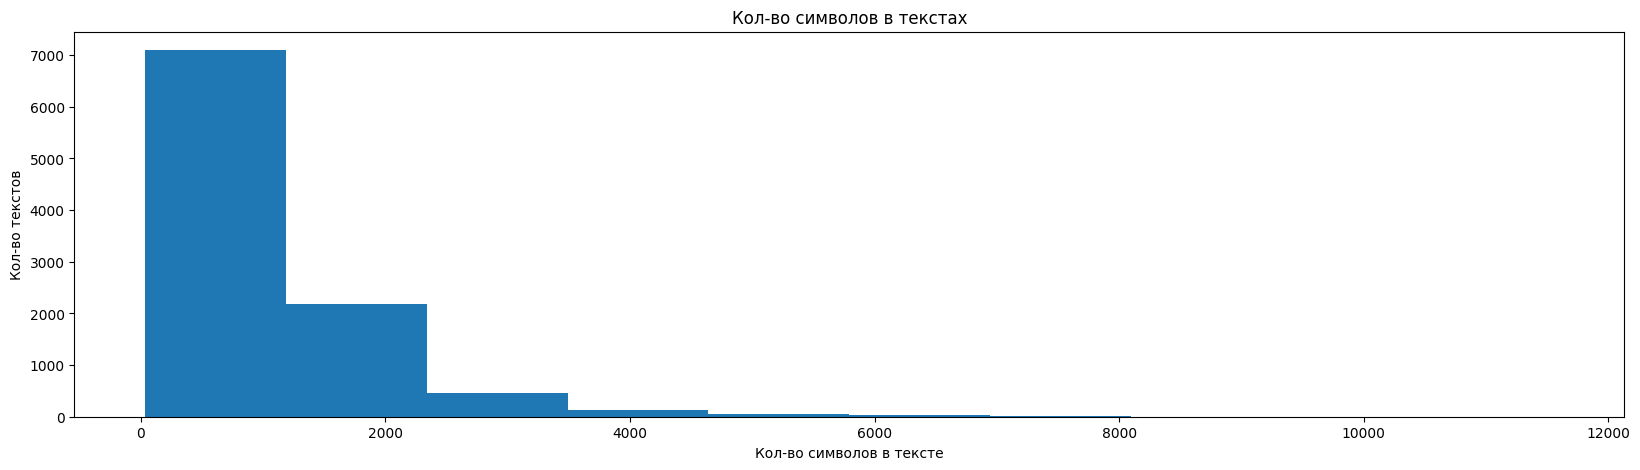

In [ ]:
plt.figure(figsize=(20,5))
plt.hist(count_letters)
plt.title("Кол-во символов в текстах")
plt.xlabel("Кол-во символов в тексте")
plt.ylabel("Кол-во текстов")

**3. Найдите 10 самых частых:**

- Слов

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from string import punctuation
from collections import Counter

In [ ]:
corpus = [token for tweet in df_small.text for token in word_tokenize(tweet) if token not in punctuation]

In [ ]:
freq_dict = Counter(corpus)

In [ ]:
freq_dict.most_common(10)

[('в', 61908),
 ('и', 54151),
 ('не', 44628),
 ('на', 34851),
 ('что', 31967),
 ('с', 24395),
 ('я', 23792),
 ('по', 19816),
 ('мне', 16155),
 ('банка', 13945)]

- Cлов без стоп-слов

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
mystopwords = stopwords.words('russian') + [
    'это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д',
    'который','прошлый','сей', 'свой', 'наш', 'мочь', 'такой', 'г'
]
ru_words = re.compile("[А-Яа-я]+")


def words_only(text):
    return " ".join(ru_words.findall(text))

def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

def preprocess(text):
    return remove_stopwords(words_only(text.lower()))

In [ ]:
list_wsw = df_small.text.apply(preprocess)

In [ ]:
corpus_wsw = [token for tweet in list_wsw for token in word_tokenize(tweet) if token not in punctuation]

In [ ]:
freq_dict_wsw = Counter(corpus_wsw)

In [ ]:
freq_dict_wsw.most_common(10)

[('банка', 16520),
 ('банк', 13527),
 ('деньги', 6522),
 ('карты', 5601),
 ('карту', 5353),
 ('кредит', 4778),
 ('день', 4491),
 ('банке', 4066),
 ('года', 3566),
 ('очень', 3550)]

- Лемм

In [ ]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 30.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=c70afe15033590d34130e1d47bbafed76e01bd3f01ad7d6b539d8b499845498a
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import pymorphy2
m = pymorphy2.MorphAnalyzer()

In [ ]:
def lemmatize(text, mystem=m):
    try:
        return " ".join([m.parse(w)[0].normal_form for w in text.split(' ')]).strip()
    except:
        return " "

def preprocess_lem(text):
    return remove_stopwords(lemmatize(words_only(text.lower())))

In [ ]:
list_lem = df_small.text.apply(preprocess_lem)

In [ ]:
corpus_lem = [token for tweet in list_lem for token in word_tokenize(tweet) if token not in punctuation]

In [ ]:
freq_dict_lem = Counter(corpus_lem)

In [ ]:
freq_dict_lem.most_common(10)

[('банк', 40358),
 ('карта', 17789),
 ('кредит', 9733),
 ('день', 9354),
 ('сотрудник', 9009),
 ('деньга', 8834),
 ('всё', 8543),
 ('клиент', 7772),
 ('сумма', 6627),
 ('счёт', 6493)]

- Cуществительных

In [ ]:
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()

In [ ]:
corpus_nouns = []
for word in corpus_lem:
  ana = pymorphy2_analyzer.parse(word)
  if ana[0].tag.POS == 'NOUN':
    corpus_nouns.append(word)

In [ ]:
freq_dict_nouns = Counter(corpus_nouns)

In [ ]:
freq_dict_nouns.most_common(10)

[('банк', 40358),
 ('карта', 17789),
 ('кредит', 9733),
 ('день', 9354),
 ('сотрудник', 9009),
 ('деньга', 8834),
 ('клиент', 7772),
 ('сумма', 6627),
 ('счёт', 6493),
 ('год', 6491)]

**4. Постройте кривые Ципфа и Хипса**

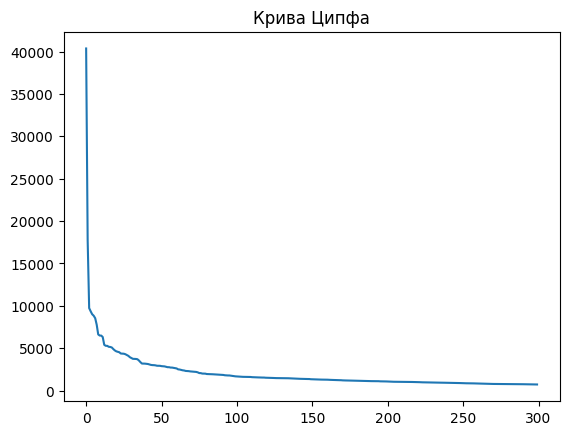

In [ ]:
freqs = list(freq_dict_lem.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(range(300),freqs[:300])
plt.title("Крива Ципфа")
plt.show()

In [ ]:
from tqdm import tqdm

cnt = Counter()
n_words = []
n_tokens = []
tokens = []
for index, row in tqdm(df_small.iterrows(), total = len(df_small)):
    tokens = word_tokenize(row['text'])
    cnt.update([token for token in tokens if token not in punctuation])
    n_words.append(len(cnt))
    n_tokens.append(cnt.total())

100%|██████████| 10000/10000 [00:39<00:00, 251.55it/s]


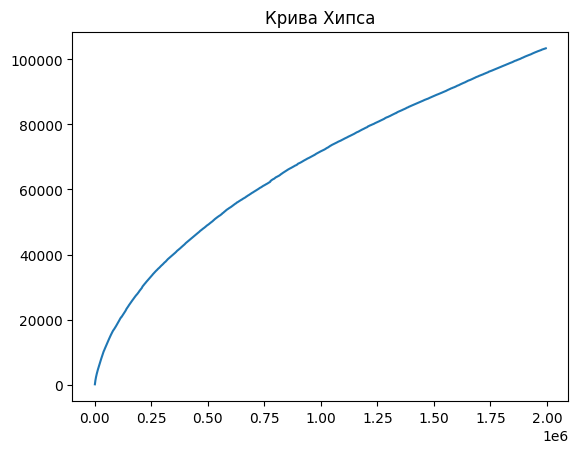

In [ ]:
fig, ax = plt.subplots()
ax.plot(n_tokens, n_words)
plt.title("Крива Хипса")
plt.show()

**5. Ответьте на следующие вопросы:**

- какое слово встречается чаще, "сотрудник" или "клиент"?

In [ ]:
freq_dict_lem['сотрудник']

9009

In [ ]:
freq_dict_lem['клиент']

7772

Ответ: Чаще встречается слово "Сотрудник"

- сколько раз встречается слова "мошенничество" и "доверие"?

In [ ]:
print(f'Слово "мошенничество" встречается {freq_dict_lem["мошенничество"]} раз')
print(f'Слово "доверие" встречается {freq_dict_lem["доверие"]} раза')

Слово "мошенничество" встречается 200 раз
Слово "доверие" встречается 154 раза


**6. В поле "rating_grade" записана оценка отзыва по шкале от 1 до 5. Используйте меру "td-idf", для того, чтобы найти ключевые слова и биграмы для положительных отзывов (с оценкой 5) и отрицательных отзывов (с оценкой 1)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
df_small_1 = df_small[df_small['rating_grade'] == 1]

In [ ]:
text_small_1 = df_small_1['text']

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize)

In [ ]:
tfidf_matrix = tfidf_vectorizer.fit_transform(text_small_1)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]

In [ ]:
sorted_keywords = [word for _, word in sorted(zip(tfidf_scores, feature_names), reverse=True)]

In [ ]:
print("Топ 10 ключевых униграм для рейтинга 1:", sorted_keywords[0:10])

Топ 10 ключевых униграм для рейтинга 1: [',', 'расследование', 'заявлению', 'камер', 'ситифон', 'проведено', 'в', 'моему', '.', 'дней']


In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2), tokenizer=word_tokenize)

In [ ]:
tfidf_matrix = tfidf_vectorizer.fit_transform(text_small_1)

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]

In [ ]:
sorted_keywords = [word for _, word in sorted(zip(tfidf_scores, feature_names), reverse=True)]

In [ ]:
print("Топ 10 ключевых биграм для рейтинга 1:", sorted_keywords[0:10])

Топ 10 ключевых биграм для рейтинга 1: ['моему заявлению', 'результате которого', 'камер ,', 'в ситифон', 'по моему', 'расследование ,', 'установлено несколько', 'уже состоялась', 'удержание банком', 'таким вопиющим']


In [ ]:
df_small_5 = df_small[df_small['rating_grade'] == 5]

In [ ]:
text_small_5 = df_small_5['text']

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize)

In [ ]:
tfidf_matrix = tfidf_vectorizer.fit_transform(text_small_5)

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]

In [ ]:
sorted_keywords = [word for _, word in sorted(zip(tfidf_scores, feature_names), reverse=True)]

In [ ]:
print("Топ 10 ключевых униграм для рейтинга 5:", sorted_keywords[0:10])

Топ 10 ключевых униграм для рейтинга 5: ['.', 'выдачей', 'кредита', 'юлии', 'втб24', 'оформили', 'никаких', 'сторонними', 'расходов', 'подачей']


In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2), tokenizer=word_tokenize)

In [ ]:
tfidf_matrix = tfidf_vectorizer.fit_transform(text_small_5)

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]

In [ ]:
sorted_keywords = [word for _, word in sorted(zip(tfidf_scores, feature_names), reverse=True)]

In [ ]:
print("Топ 10 ключевых биграм для рейтинга 5:", sorted_keywords[0:10])

Топ 10 ключевых биграм для рейтинга 5: ['выдачей кредита', 'не нужно', 'является сейчас', 'юлия подробно', 'юлии анатольевне', 'этого специалиста', 'что сомнений', 'что никуда', 'ходить и', 'условий юлия']


# **Часть 2. Тематическое моделирование**

**1. Постройте несколько тематических моделей коллекции документов с разным числом тем. Приведите примеры понятных (интерпретируемых) тем.**

In [ ]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim import similarities

In [ ]:
list_lem

0       здравствуйте хотеться выразить благодарность б...
1       уважаемый представитель департамент работа про...
2       здравствуйте столкнуться ситуация год взять ип...
3       июнь москва отделение адрес смоленский сенной ...
4       история очень долгий прийти банк маязакрывать ...
                              ...                        
9995    здравствуйте являться клиент росбанк очень быс...
9996    примерно ч адрес нижний новгород ул минин дале...
9997    февраль год взять потребительский кредит оформ...
9998    добрый день ноябрь год оплата штраф гибдд прои...
9999    добрый день март год ваш колл центр подать пре...
Name: text, Length: 10000, dtype: object

In [ ]:
texts = [text.split() for text in list_lem]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [ ]:
index = similarities.MatrixSimilarity(corpus_tfidf)
sims = index[corpus_tfidf]

In [ ]:
from gensim.models import lsimodel

- 5 тем

In [ ]:
lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=5)

In [ ]:
lsi.show_topics(5)

[(0,
  '0.197*"карта" + 0.141*"кредит" + 0.116*"деньга" + 0.112*"вклад" + 0.110*"счёт" + 0.104*"сумма" + 0.101*"заявление" + 0.100*"сотрудник" + 0.099*"платёж" + 0.098*"отделение"'),
 (1,
  '0.299*"вклад" + -0.242*"звонок" + -0.230*"номер" + 0.222*"карта" + -0.199*"кредит" + -0.175*"ваш" + -0.148*"телефон" + -0.134*"звонить" + -0.123*"данные" + 0.123*"деньга"'),
 (2,
  '0.616*"вклад" + -0.235*"карта" + 0.168*"ставка" + -0.153*"банкомат" + 0.139*"договор" + -0.136*"сбербанк" + 0.133*"условие" + 0.112*"пополнение" + 0.110*"процент" + -0.109*"средство"'),
 (3,
  '-0.344*"страховка" + -0.316*"кредит" + -0.258*"страхование" + 0.227*"номер" + 0.219*"вклад" + 0.155*"звонок" + -0.141*"договор" + -0.134*"страховой" + -0.129*"платёж" + 0.129*"телефон"'),
 (4,
  '0.225*"вклад" + 0.194*"договор" + 0.185*"средство" + -0.161*"заявка" + 0.160*"денежный" + 0.157*"сумма" + 0.138*"счёт" + -0.137*"отделение" + 0.134*"руб" + 0.128*"рубль"')]

1. Кредитная карта
2. Вклад онлайн, без звонка
3. Условия по вкладам
4. Телефонная консультация по вкладам
5. Обращение по конкретному вкладу

- 10 тем

In [ ]:
lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=25)

In [ ]:
lsi.show_topics(5)

[(0,
  '0.197*"карта" + 0.141*"кредит" + 0.116*"деньга" + 0.112*"вклад" + 0.110*"счёт" + 0.104*"сумма" + 0.101*"заявление" + 0.100*"сотрудник" + 0.099*"платёж" + 0.098*"отделение"'),
 (1,
  '-0.299*"вклад" + 0.242*"звонок" + 0.230*"номер" + -0.221*"карта" + 0.199*"кредит" + 0.175*"ваш" + 0.148*"телефон" + 0.134*"звонить" + -0.123*"деньга" + 0.123*"данные"'),
 (2,
  '0.615*"вклад" + -0.236*"карта" + 0.169*"ставка" + -0.153*"банкомат" + 0.139*"договор" + -0.136*"сбербанк" + 0.133*"условие" + 0.112*"пополнение" + 0.110*"процент" + -0.109*"средство"'),
 (3,
  '0.344*"страховка" + 0.315*"кредит" + 0.259*"страхование" + -0.226*"номер" + -0.219*"вклад" + -0.156*"звонок" + 0.141*"договор" + 0.135*"страховой" + 0.131*"платёж" + -0.128*"телефон"'),
 (4,
  '0.223*"вклад" + 0.195*"договор" + 0.186*"средство" + 0.161*"денежный" + -0.160*"заявка" + 0.157*"сумма" + 0.137*"счёт" + -0.133*"отделение" + 0.131*"руб" + 0.128*"рубль"')]

1. Кредитная карта
2. Телефонная консультация по кредиту
3. Обращение по страхованию вклада
4. Обращение по страхованию кредита
5. Обращение по конкретному вкладу

**2. Найдите темы, в которых упомянуты конкретные банки (Сбербанк, ВТБ, другой банк). Можете ли вы их прокомментировать / объяснить? Эта часть задания может быть сделана с использованием gensim.**

In [ ]:
lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=50)

In [ ]:
sber = []
search = 'сбербанк'
for n, i in lsi.show_topics(50):
  if search in i:
    sber.append(i)

In [ ]:
sber

['-0.615*"вклад" + 0.236*"карта" + -0.169*"ставка" + 0.152*"банкомат" + -0.139*"договор" + 0.136*"сбербанк" + -0.132*"условие" + -0.113*"пополнение" + -0.110*"процент" + 0.109*"средство"',
 '0.248*"страхование" + -0.232*"платёж" + 0.228*"страховка" + 0.194*"сбербанк" + -0.172*"просрочка" + -0.169*"задолженность" + 0.154*"заявление" + -0.139*"платить" + 0.139*"страховой" + 0.137*"денежный"',
 '-0.511*"банкомат" + -0.236*"страховка" + -0.175*"комиссия" + -0.144*"деньга" + -0.143*"рубль" + -0.124*"купюра" + 0.118*"сбербанк" + -0.118*"страхование" + 0.118*"киви" + 0.117*"кошелёк"',
 '0.324*"киви" + 0.292*"кошелёк" + 0.216*"перевод" + -0.213*"банкомат" + -0.181*"сбербанк" + -0.179*"заявление" + -0.175*"отделение" + 0.161*"страховка" + 0.158*"комиссия" + -0.155*"карта"',
 '0.517*"сбербанк" + -0.305*"заявка" + -0.225*"банкомат" + 0.151*"страховка" + -0.144*"кредитный" + -0.139*"лимит" + 0.132*"онлайн" + -0.119*"альфа" + 0.107*"вклад" + -0.106*"рассмотрение"',
 '0.292*"курс" + 0.256*"счёт" + -

In [ ]:
vtb = []
search = 'втб'
for n, i in lsi.show_topics(50):
  if search in i:
    vtb.append(i)

In [ ]:
vtb

['0.336*"терминал" + -0.193*"втб" + 0.192*"ваш" + 0.183*"заявление" + -0.177*"альфа" + 0.162*"заявка" + -0.160*"документ" + 0.150*"стандарт" + 0.143*"русский" + -0.138*"банкомат"',
 '0.216*"втб" + -0.213*"заявление" + 0.191*"терминал" + -0.180*"перевод" + -0.176*"сч" + 0.171*"стандарт" + 0.165*"русский" + 0.154*"комиссия" + -0.152*"связный" + -0.146*"заявка"',
 '-0.353*"сч" + 0.224*"справка" + 0.177*"перевод" + -0.165*"заявление" + 0.159*"подарок" + -0.144*"втб" + 0.140*"рубль" + -0.126*"списание" + 0.113*"услуга" + 0.111*"письмо"',
 '0.246*"страхование" + -0.203*"втб" + 0.170*"офис" + 0.160*"ставка" + 0.157*"май" + -0.138*"менеджер" + -0.135*"страховка" + -0.125*"телебанк" + -0.124*"процент" + -0.123*"услуга"',
 '0.202*"процент" + -0.193*"центр" + 0.186*"горячий" + 0.182*"линия" + 0.181*"деньга" + 0.178*"выписка" + -0.157*"колл" + -0.156*"втб" + 0.135*"задолженность" + 0.132*"депозит"',
 '0.255*"втб" + 0.254*"связный" + -0.209*"поддержка" + -0.199*"служба" + 0.184*"номер" + -0.161*"до

Темы разные. Допустим в первой теме по Сберу обсуждаются банкоматы Сбербанка, а в во второй теме ВТБ обсуждается комиссия за снятия в банке русский стандарт

# **Часть 3. Классификация текстов**

**Сформулируем для простоты задачу бинарной классификации: будем классифицировать на два класса, то есть, различать резко отрицательные отзывы (с оценкой 1) и положительные отзывы (с оценкой 5).**

**1. Составьте обучающее и тестовое множество: выберите из всего набора данных N1 отзывов с оценкой 1 и N2 отзывов с оценкой 5 (значение N1 и N2 – на ваше усмотрение). Используйте sklearn.model_selection.train_test_split для разделения множества отобранных документов на обучающее и тестовое.**

In [ ]:
df_3 = df_small[df_small['rating_grade'].isin([1,5])]

In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4748 entries, 0 to 9998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   city                4748 non-null   object        
 1   rating_not_checked  4748 non-null   bool          
 2   title               4748 non-null   object        
 3   num_comments        4748 non-null   int64         
 4   bank_license        4746 non-null   object        
 5   author              4748 non-null   object        
 6   bank_name           4748 non-null   object        
 7   datetime            4748 non-null   datetime64[ns]
 8   text                4748 non-null   object        
 9   rating_grade        4748 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 375.6+ KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_3.text, df_3.rating_grade, test_size=0.3)

**2. Используйте любой известный вам алгоритм классификации текстов для решения задачи и получите baseline. Сравните разные варианты векторизации текста: использование только униграм, пар или троек слов или с использованием символьных n-грам.**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import *

In [ ]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train) # bow -- bag of words (мешок слов)

In [ ]:
clf = LogisticRegression(random_state=42, solver='liblinear')
clf.fit(bow, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         1.0       0.99      0.96      0.98      1168
         5.0       0.85      0.96      0.90       257

    accuracy                           0.96      1425
   macro avg       0.92      0.96      0.94      1425
weighted avg       0.97      0.96      0.96      1425



In [ ]:
f1_score(y_test, pred, average=None)

array([0.97700651, 0.90275229])

In [ ]:
vec = CountVectorizer(ngram_range=(2, 2))
bow = vec.fit_transform(x_train) # bow -- bag of words (мешок слов)

In [ ]:
clf.fit(bow, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         1.0       1.00      0.92      0.96      1238
         5.0       0.65      0.99      0.78       187

    accuracy                           0.93      1425
   macro avg       0.82      0.96      0.87      1425
weighted avg       0.95      0.93      0.93      1425



In [ ]:
f1_score(y_test, pred, average=None)

array([0.95663158, 0.78315789])

In [ ]:
vec = CountVectorizer(ngram_range=(3, 3))
bow = vec.fit_transform(x_train) # bow -- bag of words (мешок слов)

In [ ]:
clf.fit(bow, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         1.0       1.00      0.82      0.90      1391
         5.0       0.12      1.00      0.21        34

    accuracy                           0.82      1425
   macro avg       0.56      0.91      0.56      1425
weighted avg       0.98      0.82      0.88      1425



In [ ]:
f1_score(y_test, pred, average=None)

array([0.89952532, 0.21118012])

Лучшую метрику показывает классификация по униграмам

**3. Сравните, как изменяется качество решения задачи при использовании скрытых тем в качестве признаков:**

1-ый вариант: tf-idf
 преобразование (sklearn.feature_extraction.text.TfidfTransformer) и сингулярное разложение (оно же – латентый семантический анализ) (sklearn.decomposition.TruncatedSVD)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD

In [ ]:
clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('tm', TruncatedSVD()),
    ('clf', LogisticRegression())
])

In [ ]:
clf.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('tm', TruncatedSVD()), ('clf', LogisticRegression())])

In [ ]:
pred = clf.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         1.0       1.00      0.87      0.93      1306
         5.0       0.41      0.98      0.57       119

    accuracy                           0.88      1425
   macro avg       0.70      0.93      0.75      1425
weighted avg       0.95      0.88      0.90      1425



In [ ]:
f1_score(y_test, pred, average=None)

array([0.92918543, 0.57493857])

2-ой вариант: тематические модели LDA (sklearn.decomposition.LatentDirichletAllocation). Используйте accuracy и F-measure для оценки качества классификации.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
clf = Pipeline([
    ('vect', CountVectorizer()),
    ('lda', LatentDirichletAllocation()),
    ('clf', LogisticRegression())
])

In [ ]:
clf.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()),
                ('lda', LatentDirichletAllocation()),
                ('clf', LogisticRegression())])

In [ ]:
pred = clf.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         1.0       1.00      0.87      0.93      1305
         5.0       0.41      0.97      0.57       120

    accuracy                           0.88      1425
   macro avg       0.70      0.92      0.75      1425
weighted avg       0.95      0.88      0.90      1425



In [ ]:
f1_score(y_test, pred, average=None)

array([0.92874693, 0.57352941])

Вывод: в контексте данной выборки наилучшее качество показывает обычная линейная регрессия при использовании униграм